In [19]:
from matplotlib import pyplot as plt
import seaborn as sn

from firebase import firebase  #firebase data retrieving code #live
firebase = firebase.FirebaseApplication('https://hackalz.firebaseio.com/', None)
result = firebase.get('/data', None)
result # type(result)=dict, JSON formate
p = list(result.values())
#absprint(p)


# print(p)
player_names = list(result.keys())
#l4
# print(player_names)
#--------------------------------------------------------
player_ages = []

player_genders = []
player_genetics = []
player_edu = []
player_genderb=[]



#---------------------------------------------
for i in p:
    data = list(i.values())
#     print(data)
#     print("------")
    #print(len(data))
    


#---------------------------------------------
# for i in p:
    
#     data = list(i.values())
#     #print((data[0]["age"]))
#     #print(data[0]['gender'])
#     player_ages.append(int(data[0]["age"]))
#     player_genders.append(data[0]["gender"])
#     player_genetics.append(data[0]["genetic"])
#     player_edu.append(data[0]["education"])
    

# print(player_ages)
# print(player_genders)
for i in player_genders:
    if(i=='M'):
        player_genderb.append(1)
    elif(i=='F'):
        player_genderb.append(0)
    else:
        player_genderb.append(-1)
    #print(l5)

# l5 = list(l3[0].values())
# type(l5)
# l6 = l5[0]
# l6
# l7 = l6['age']

In [20]:
from matplotlib import pyplot as plt
import seaborn as sn

from firebase import firebase  #firebase data retrieving code #live
firebase = firebase.FirebaseApplication('https://hackalz.firebaseio.com/', None)
result = firebase.get('/data', None)
result # type(result)=dict, JSON formate
p = list(result.values())
#absprint(p)


# print(p)
player_names = list(result.keys())
# print(player_names)
#--------------------------------------------------------
player_ages = []
player_genders = []
player_genetics = []
player_edu = []
player_genderb=[]



#---------------------------------------------
scoresheet = []
for i in p:
    data = list(i.values())
    
    #print(data[0])
    #print(data[0]["age"])
    player_ages.append(int(data[0]['age']))
    player_genders.append(data[0]['gender'])
    age = data[0]["age"]
    if int(age) >=60:
        agescore = 36
    elif 40 <= int(age) < 60:
        agescore = 60
    else: 
        agescore = 90
    
    gender =  data[0]["gender"]
    
    if gender == "F" : 
        genderscore = 18
    else:
        genderscore = 30
    
    genetic =  data[0]["genetic"]
    
    if genetic == "Y":
        geneticscore = 0
    else: 
        geneticscore = 60
        
    edu =  data[0]["education"]
    if edu == "Less than High school":
        eduscore = 15
    elif edu == "High school":
        eduscore = 25
    else:
        eduscore = 35
        
    exe =  data[0]["exercise"]
    if exe == "Daily":
        exescore = 15
    elif exe == "Monthly":
        exescore = 25
    elif exe == "Weekly":
        exescore = 25
    else:
        exescore = 35
    
    #print("------")
    #print(agescore, genderscore, geneticscore , eduscore, exescore )
    personal_score = agescore +  genderscore +  geneticscore +  eduscore +  exescore 
    
    
    
        
    
        
    
    
        
    
    
    
    #-----------------------------------
    if len(data) > 12:
        scores = []
        #team size greater than 11
        attempts = int(len(data)/11)
        
        for j in range(attempts):
            score = 0
            for k in range(1,12):
                #print(int(data[k + (j*12)]["score"]))
                score+= data[k+j*12]["score"]
            scores.append(score)
    else:
        score = 0
        scores = []
        for j in range(1,11):
            try:
                #print(data[j]["score"])
                score+= data[j]["score"]
                #print(score)
            except:
                break
        print("---")
        scores.append(score)
        
        
    
    
    if len(scores)>1:
        sum = 0
        for each in scores:
            sum+=each
        sum = sum + len(scores)*personal_score//len(scores)
        scoresheet.append(sum)
    else:
        scoresheet.append(scores[0] + personal_score)
        
scoresheet      
        
        
    
        

            
            

---
---
---


[287, 232, 242, 359, 204]

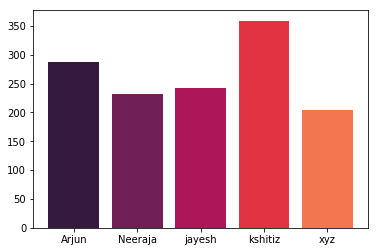

In [21]:
import seaborn as sns
fig = plt.bar(player_names, scoresheet, color=sns.color_palette("rocket"))



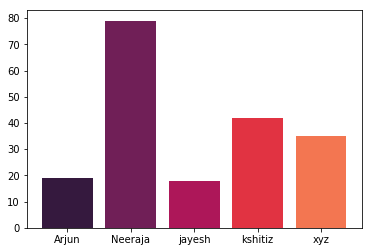

In [22]:
fig1 = plt.bar(player_names, player_ages, color=sns.color_palette("rocket"))

In [23]:
# total_time=[]
# total_score=[]
# age = []
# print(player_names)
# for i in range(len(player_names)):
#     l5 = list(p[i].values()) #player values
#     l6 = list(l5[0].values()) #
#     l8=[]
#     for i in range(1,len(l5)):
#         l7 = list(l5[i].values())
#         l8.append(l7)
#     totalscore=0
#     totaltime=0
#     for i in range(len(l8)):
#         totalscore+= int(l8[i][0])
#         totaltime+= int(l8[i][1])
#     total_time.append(totaltime)
#     total_score.append(totalscore)
# # print("totalscore = ",totalscore)
# # print("totaltime = ",totaltime)
# total_score,total_time


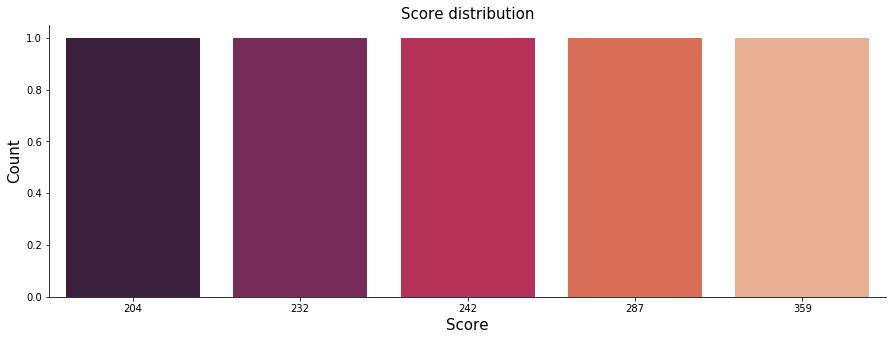

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(scoresheet,palette="rocket")
ax.set_xlabel('Score', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Score distribution', fontsize=15)
sns.despine()

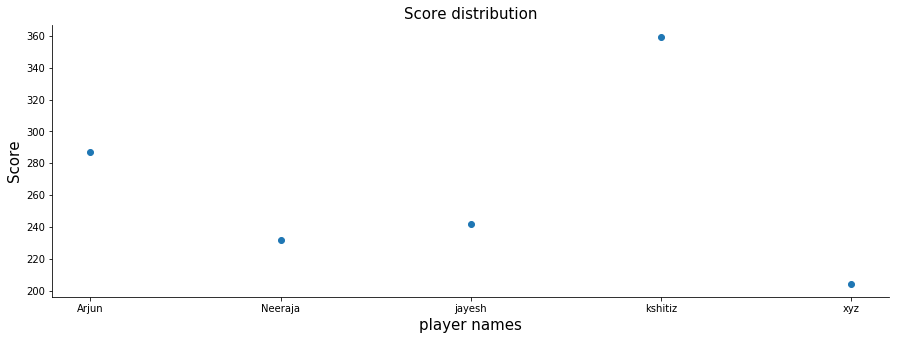

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
plt.scatter(player_names,scoresheet)
ax.set_xlabel('player names', fontsize=15)
ax.set_ylabel('Score', fontsize=15)
ax.set_title('Score distribution', fontsize=15)
sns.despine()

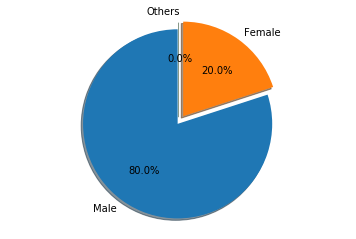

In [27]:
labels = 'Male', 'Female','Others'
sizes = [player_genders.count('M'),player_genders.count('F'),player_genders.count('O')]
explode = (0.05,0.05,0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()